# Plot the calibration period hydr

This Notebook plots the D-HYDRO result of the calibration period.

## Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Locate the results and the observations

In [2]:
HBV_mod = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\Kalibratieperiode\HBV_cal\dflowfm\output\csv"
Wflow_mod = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\Kalibratieperiode\Wflow_cal\dflowfm\output\csv"
Observations = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\Observations"

## Create Dataframe containing the locations and the NSE values of the simulation

In [3]:
locations = pd.DataFrame()
locations['id'] = ['M_43035','M_45090','M_42882','M_43197','M_43488','M_43651','M_43047','M_240219']
locations['Station_id'] = ['10Q36','10Q63','11Q32','13Q34','12Q31','10Q30','10Q29','Sippenaeken_Q']
locations['Name'] = ['Meerssen', 'Schin op Geul','Eys (Eyserbeek)','Azijnfabriek (Gulp)','Partij (Selzerbeek)','Hommerich',
                     'Cottessen','Sippenaeken (B)']
locations['NSE_HBV'] = [0.79,'--',0.47,0.56,0.70,0.68,0.68,0.72]
locations['NSE_Wflow'] = [0.51,'--',0.12,-0.41,-3.24,0.09,0.34,0.47]

## Plot calibration results

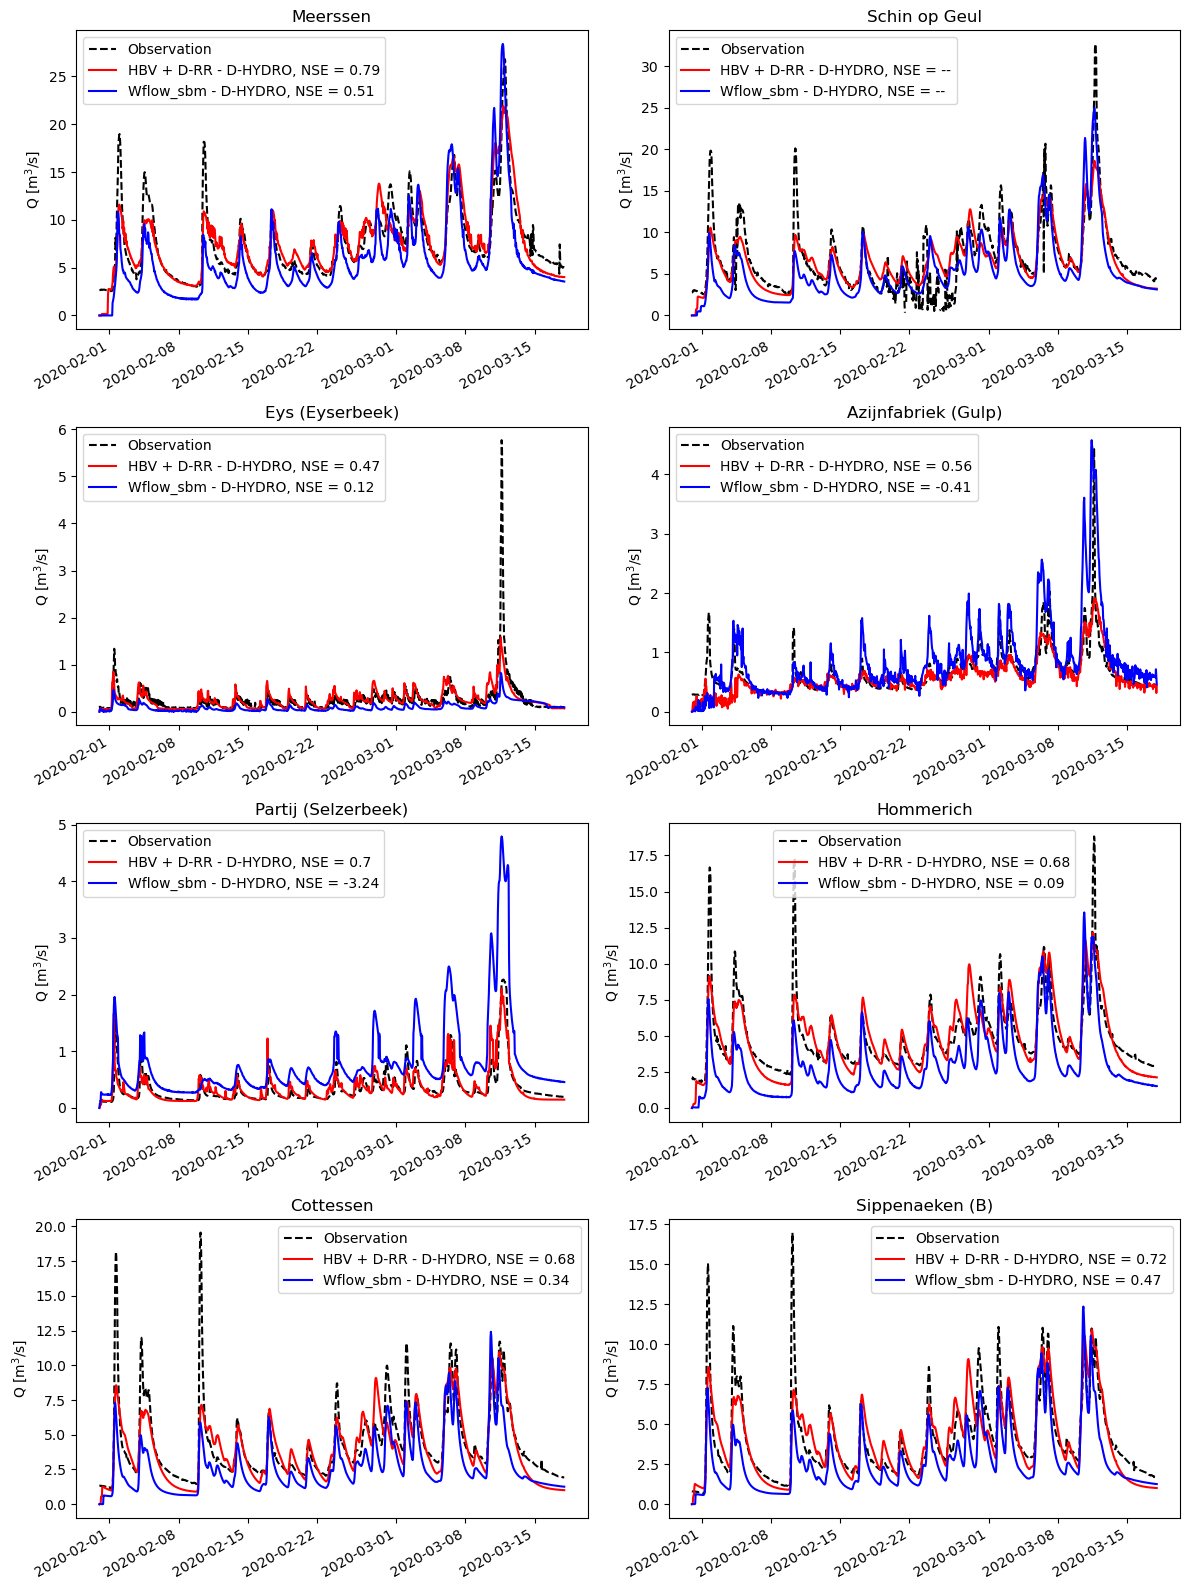

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Observation = os.path.join(Observations, locations.Station_id[i] + '.csv')
    
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Obs = pd.read_csv(Observation, index_col=[0], parse_dates=[0])
    
    try:
        Obs.loc[H.index]
        ax.plot(Obs.loc[H.index], label = 'Observation', linestyle='--',color='black')
    except KeyError as e:
        continue
    #ax.plot(Org.index, Org.discharge_magnitude, label='Original Limburg Model')
    ax.plot(H.index, H.discharge_magnitude, label=f'HBV + D-RR - D-HYDRO, NSE = {locations.NSE_HBV[i]}', color='red')
    ax.plot(W.index, W.discharge_magnitude, label=f'Wflow_sbm - D-HYDRO, NSE = {locations.NSE_Wflow[i]}', color='blue') 
    
    ax.legend(loc='best')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')

    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    
plt.tight_layout()
plt.show()